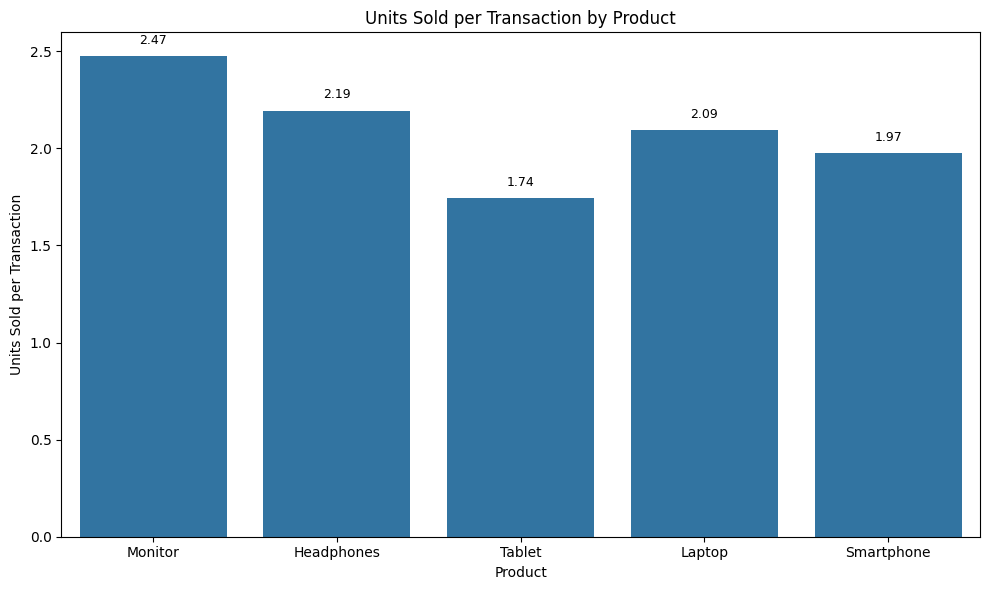

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("product_sales_fresh.csv")

# Swap columns if needed
df.rename(columns={"Transactions":"Units_Sold","Units_Sold": "Transactions"}, inplace=True)

# Group and calculate
grouped = df.groupby("Product")[["Units_Sold", "Transactions"]].sum().reset_index()
grouped["Units_Sold_Per_Transaction"] = grouped["Units_Sold"] / grouped["Transactions"]

# Sort by Transactions (optional)
grouped = grouped.sort_values(by="Transactions", ascending=True).reset_index(drop=True)

# Plotting
plt.close('all')  # Ensure clean start
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=grouped, x="Product", y="Units_Sold_Per_Transaction", ax=ax)

# Add data labels above bars
for i, row in grouped.iterrows():
    ax.text(i, row["Units_Sold_Per_Transaction"] + 0.05, 
            f"{row['Units_Sold_Per_Transaction']:.2f}",
            ha='center', va='bottom', fontsize=9)

# Aesthetics
ax.set_title("Units Sold per Transaction by Product")
ax.set_xlabel("Product")
ax.set_ylabel("Units Sold per Transaction")
plt.tight_layout()
plt.show()